In [1]:
import pandas as pd
import numpy as np 
import statsmodels.api as sm
import statsmodels.formula.api as smf
import matplotlib.pyplot as plt 
import seaborn as sns 
import scipy as sp

## Take a Look at the Data

In [4]:
df =  pd.read_excel('D:/twin_dat.xlsx')
df.head()

,first,educ,educt,hrwage,lwage,age,white,female,selfemp,uncov,...,dcsuminz,duncov,dmaried,dtenure,pedhs,pedcl,dcpedhs,dcpedhst,dcpedcl,dcpedclt
0,1.0,16.0,16.0,11.935570,2.479523,33.25119,1.0,1.0,0.0,0.0,...,0.0,0.0,0.0,1.333,1.0,0.0,0.0,0.0,0.0,0.0
1,NaN,16.0,16.0,9.208958,2.220177,33.25119,1.0,1.0,0.0,0.0,...,0.0,0.0,0.0,-1.333,1.0,0.0,0.0,0.0,0.0,0.0
2,NaN,12.0,16.0,9.283223,2.228209,43.57014,1.0,1.0,0.0,1.0,...,-90.0,0.0,0.0,-3.000,1.0,0.0,-4.0,-6.0,0.0,0.0
3,1.0,18.0,12.0,19.096920,2.949527,43.57014,1.0,1.0,0.0,1.0,...,56.0,0.0,0.0,3.000,1.0,0.0,6.0,4.0,0.0,0.0
4,NaN,12.0,12.0,15.447340,2.728481,30.98391,1.0,0.0,0.0,1.0,...,0.0,1.0,0.0,-1.500,1.0,0.0,0.0,0.0,0.0,0.0


In [5]:
df1 = df[['educ','hrwage']]
df1.head()

,educ,hrwage
0,16.0,11.935570
1,16.0,9.208958
2,12.0,9.283223
3,18.0,19.096920
4,12.0,15.447340


In [8]:
df_f = df[df['female'] == 1]
df_nf = df[df['female'] == 0]
df_f.head()

,first,educ,educt,hrwage,lwage,age,white,female,selfemp,uncov,...,dcsuminz,duncov,dmaried,dtenure,pedhs,pedcl,dcpedhs,dcpedhst,dcpedcl,dcpedclt
0,1.0,16.0,16.0,11.935570,2.479523,33.25119,1.0,1.0,0.0,0.0,...,0.0,0.0,0.0,1.333,1.0,0.0,0.0,0.0,0.0,0.0
1,NaN,16.0,16.0,9.208958,2.220177,33.25119,1.0,1.0,0.0,0.0,...,0.0,0.0,0.0,-1.333,1.0,0.0,0.0,0.0,0.0,0.0
2,NaN,12.0,16.0,9.283223,2.228209,43.57014,1.0,1.0,0.0,1.0,...,-90.0,0.0,0.0,-3.000,1.0,0.0,-4.0,-6.0,0.0,0.0
3,1.0,18.0,12.0,19.096920,2.949527,43.57014,1.0,1.0,0.0,1.0,...,56.0,0.0,0.0,3.000,1.0,0.0,6.0,4.0,0.0,0.0
8,NaN,15.0,13.0,8.094971,2.091243,34.97878,1.0,1.0,0.0,0.0,...,28.0,0.0,-1.0,-3.000,0.0,1.0,0.0,0.0,2.0,2.0


## Summarize the Data

In [10]:
df1.describe()

,educ,hrwage
count,680.000000,680.000000
mean,14.028922,14.437772
std,2.073351,13.016287
min,8.000000,2.059872
25%,12.000000,7.426579
50%,14.000000,11.443455
75%,16.000000,16.557290
max,18.000000,133.333300


In [11]:
np.cov(df1['educ'],df1['hrwage'])

array([[  4.29878595,   8.31715411],
       [  8.31715411, 169.42372462]])

Histograms

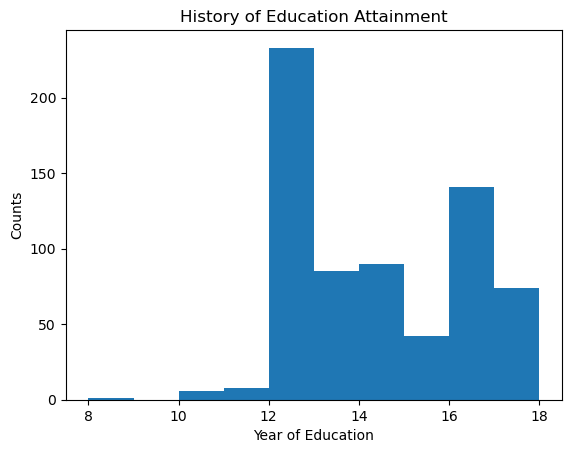

In [17]:
plt.hist(df1['educ'])
plt.title('History of Education Attainment')
plt.xlabel('Year of Education')
plt.ylabel('Counts')
plt.show()

Scatter Plots

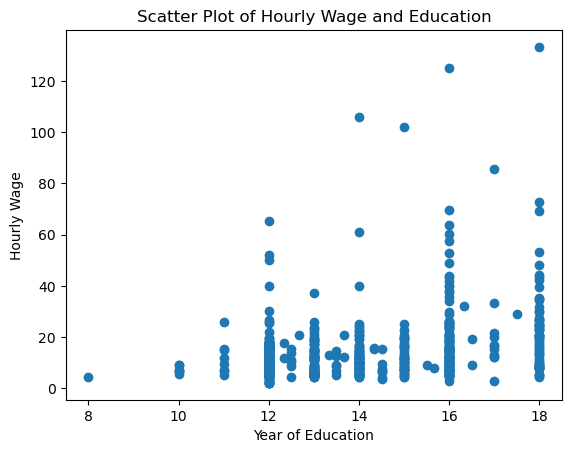

In [19]:
plt.scatter(df['educ'],df['hrwage'])
plt.title('Scatter Plot of Hourly Wage and Education')
plt.xlabel('Year of Education')
plt.ylabel('Hourly Wage')
plt.show()

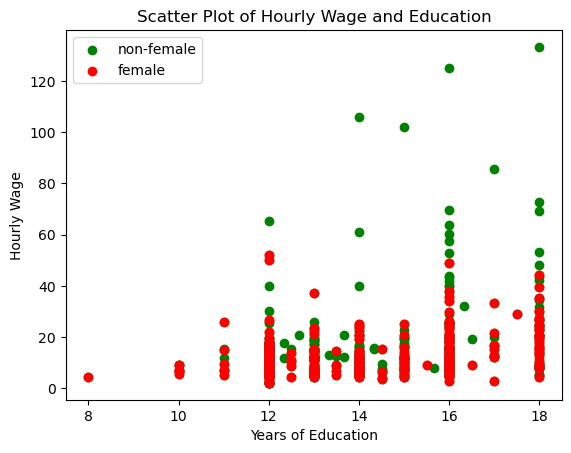

In [22]:
plt.scatter(df1['educ'],df1['hrwage'],label='non-female',color='green')
plt.scatter(df_f['educ'],df_f['hrwage'],label='female',color='red')
plt.title("Scatter Plot of Hourly Wage and Education")
plt.xlabel("Years of Education")
plt.ylabel("Hourly Wage")
plt.legend()
plt.show()

## Simple Linear Regression with One Variable

In [26]:
# Regress hourly wage hrwage on educational level educ
model = smf.ols(formula = 'hrwage~educ',data=df) # the ~ is used to separate the two sides of regression

# The model cannot be called on by itself
# Need to summarize by .fit() to get a summary of output
# To have heteroskedasticity robust standard errors, we need to write cov_type = 'HC1' inside the model.fit()
results = model.fit(cov_type='HC1')
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                 hrwage   R-squared:                       0.095
Model:                            OLS   Adj. R-squared:                  0.094
Method:                 Least Squares   F-statistic:                     49.37
Date:                Wed, 12 Jul 2023   Prob (F-statistic):           5.18e-12
Time:                        10:35:27   Log-Likelihood:                -2675.5
No. Observations:                 680   AIC:                             5355.
Df Residuals:                     678   BIC:                             5364.
Df Model:                           1                                         
Covariance Type:                  HC1                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -12.7049      3.586     -3.542      0.0

## Plot the Regression Line

Use Seaborn Library

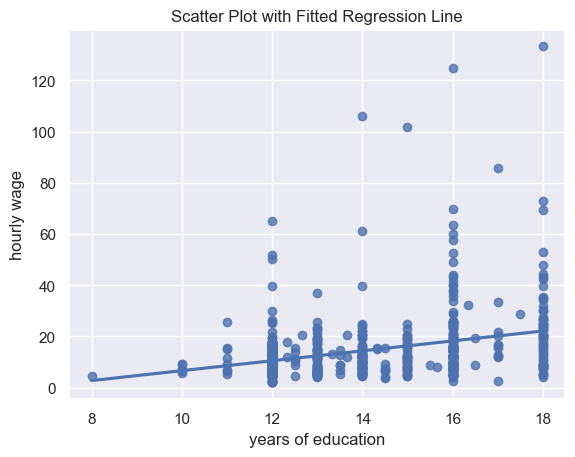

In [31]:
# Sets the graph style to those come with the library seaborn
sns.set()
sns.regplot(x='educ',y='hrwage',ci=None,data=df) # ci=None means we do not want confidence interval
plt.xlabel('years of education')
plt.ylabel('hourly wage')
plt.title('Scatter Plot with Fitted Regression Line')
plt.show()

DIY

In [33]:
# Calls out the coefficients/parameters on the intercept and on the regressor
results.params

Intercept   -12.704938
educ          1.934768
dtype: float64

In [34]:
# assign values of the parameters to two user-chosen names
# assigns the intercept value to name b0
# assigns the coefficient on educ to name b1 
b0, b1 = results.params

<function matplotlib.pyplot.show(close=None, block=None)>

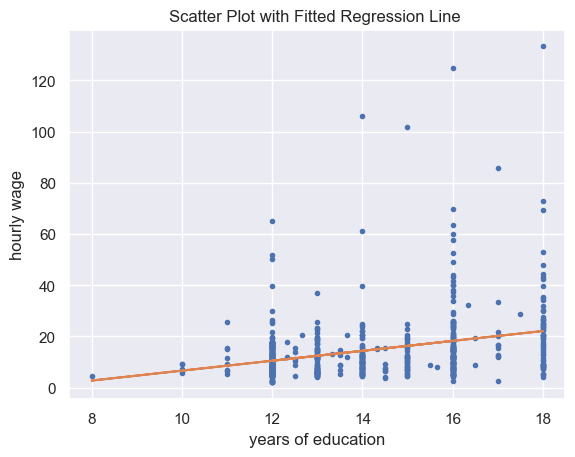

In [37]:
plt.plot(df['educ'],df['hrwage'],'.') #The third argument '.' specifies that type of the plot, in this case, the "dot".
plt.plot(df['educ'],b0+b1*df['educ'],'-') #The third argument '-' specifies that type of the plot, in this case, the "line".
plt.xlabel('years of education')
plt.ylabel('hourly wage')
plt.title('Scatter Plot with Fitted Regression Line ')
plt.show

Plot the Residuals

In [38]:
results.resid
df['resid'] = results.resid
df.head()

,first,educ,educt,hrwage,lwage,age,white,female,selfemp,uncov,...,duncov,dmaried,dtenure,pedhs,pedcl,dcpedhs,dcpedhst,dcpedcl,dcpedclt,resid
0,1.0,16.0,16.0,11.935570,2.479523,33.25119,1.0,1.0,0.0,0.0,...,0.0,0.0,1.333,1.0,0.0,0.0,0.0,0.0,0.0,-6.315782
1,NaN,16.0,16.0,9.208958,2.220177,33.25119,1.0,1.0,0.0,0.0,...,0.0,0.0,-1.333,1.0,0.0,0.0,0.0,0.0,0.0,-9.042394
2,NaN,12.0,16.0,9.283223,2.228209,43.57014,1.0,1.0,0.0,1.0,...,0.0,0.0,-3.000,1.0,0.0,-4.0,-6.0,0.0,0.0,-1.229057
3,1.0,18.0,12.0,19.096920,2.949527,43.57014,1.0,1.0,0.0,1.0,...,0.0,0.0,3.000,1.0,0.0,6.0,4.0,0.0,0.0,-3.023968
4,NaN,12.0,12.0,15.447340,2.728481,30.98391,1.0,0.0,0.0,1.0,...,1.0,0.0,-1.500,1.0,0.0,0.0,0.0,0.0,0.0,4.935060


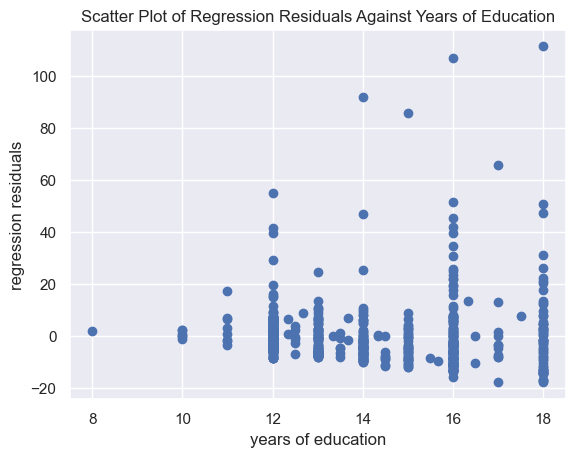

In [39]:
plt.scatter(df['educ'], df['resid'])
plt.xlabel('years of education')
plt.ylabel('regression residuals')
plt.title('Scatter Plot of Regression Residuals Against Years of Education')
plt.show()

## Regression with Multiple Regressors

Additional Regressors

In [40]:
model2 = smf.ols(formula='hrwage~educ+age',data=df)
results2 = model2.fit(cov_type='HC1')
print(results2.summary())

                            OLS Regression Results                            
Dep. Variable:                 hrwage   R-squared:                       0.166
Model:                            OLS   Adj. R-squared:                  0.164
Method:                 Least Squares   F-statistic:                     28.77
Date:                Wed, 12 Jul 2023   Prob (F-statistic):           1.02e-12
Time:                        10:56:25   Log-Likelihood:                -2647.6
No. Observations:                 680   AIC:                             5301.
Df Residuals:                     677   BIC:                             5315.
Df Model:                           2                                         
Covariance Type:                  HC1                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -28.1889      5.477     -5.147      0.0

Adding Binary Regressor

In [41]:
model3 = smf.ols(formula = "hrwage ~ educ + age + female", data = df)
results3 = model3.fit(cov_type = 'HC1')
print(results3.summary())

                            OLS Regression Results                            
Dep. Variable:                 hrwage   R-squared:                       0.210
Model:                            OLS   Adj. R-squared:                  0.207
Method:                 Least Squares   F-statistic:                     21.87
Date:                Wed, 12 Jul 2023   Prob (F-statistic):           1.59e-13
Time:                        10:57:21   Log-Likelihood:                -2629.2
No. Observations:                 680   AIC:                             5266.
Df Residuals:                     676   BIC:                             5284.
Df Model:                           3                                         
Covariance Type:                  HC1                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -22.6715      4.945     -4.585      0.0

## Transformation of Dependent Variable and Regressors

In [44]:
df['logwage'] = np.log(df['hrwage'])
df['pexp'] = df['age'] - df['educ'] - 7
df['pexp2'] = df['pexp']**2
df.head()

,first,educ,educt,hrwage,lwage,age,white,female,selfemp,uncov,...,pedhs,pedcl,dcpedhs,dcpedhst,dcpedcl,dcpedclt,resid,logwage,pexp,pexp2
0,1.0,16.0,16.0,11.935570,2.479523,33.25119,1.0,1.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,-6.315782,2.479523,10.25119,105.086896
1,NaN,16.0,16.0,9.208958,2.220177,33.25119,1.0,1.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,-9.042394,2.220177,10.25119,105.086896
2,NaN,12.0,16.0,9.283223,2.228209,43.57014,1.0,1.0,0.0,1.0,...,1.0,0.0,-4.0,-6.0,0.0,0.0,-1.229057,2.228209,24.57014,603.691780
3,1.0,18.0,12.0,19.096920,2.949527,43.57014,1.0,1.0,0.0,1.0,...,1.0,0.0,6.0,4.0,0.0,0.0,-3.023968,2.949527,18.57014,344.850100
4,NaN,12.0,12.0,15.447340,2.728481,30.98391,1.0,0.0,0.0,1.0,...,1.0,0.0,0.0,0.0,0.0,0.0,4.935060,2.737437,11.98391,143.614099


Mincer Regression

In [45]:
mincer = smf.ols(formula = "logwage ~ educ + pexp + pexp2", data = df)
resultsm = mincer.fit(cov_type = 'HC1')
print(resultsm.summary())

                            OLS Regression Results                            
Dep. Variable:                logwage   R-squared:                       0.290
Model:                            OLS   Adj. R-squared:                  0.287
Method:                 Least Squares   F-statistic:                     76.06
Date:                Wed, 12 Jul 2023   Prob (F-statistic):           2.14e-42
Time:                        11:01:49   Log-Likelihood:                -529.24
No. Observations:                 680   AIC:                             1066.
Df Residuals:                     676   BIC:                             1085.
Df Model:                           3                                         
Covariance Type:                  HC1                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.0947      0.180     -0.527      0.5

## Interaction Between Regressors

Direct method

In [47]:
df['educ_f'] = df['educ']*df['female']
df.head()

,first,educ,educt,hrwage,lwage,age,white,female,selfemp,uncov,...,pedcl,dcpedhs,dcpedhst,dcpedcl,dcpedclt,resid,logwage,pexp,pexp2,educ_f
0,1.0,16.0,16.0,11.935570,2.479523,33.25119,1.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,-6.315782,2.479523,10.25119,105.086896,16.0
1,NaN,16.0,16.0,9.208958,2.220177,33.25119,1.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,-9.042394,2.220177,10.25119,105.086896,16.0
2,NaN,12.0,16.0,9.283223,2.228209,43.57014,1.0,1.0,0.0,1.0,...,0.0,-4.0,-6.0,0.0,0.0,-1.229057,2.228209,24.57014,603.691780,12.0
3,1.0,18.0,12.0,19.096920,2.949527,43.57014,1.0,1.0,0.0,1.0,...,0.0,6.0,4.0,0.0,0.0,-3.023968,2.949527,18.57014,344.850100,18.0
4,NaN,12.0,12.0,15.447340,2.728481,30.98391,1.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,4.935060,2.737437,11.98391,143.614099,0.0


In [48]:
model_f1 = smf.ols(formula = "hrwage ~ educ + female + educ_f", data = df)
results_f1 = model_f1.fit(cov_type = 'HC1')
print(results_f1.summary())

                            OLS Regression Results                            
Dep. Variable:                 hrwage   R-squared:                       0.156
Model:                            OLS   Adj. R-squared:                  0.152
Method:                 Least Squares   F-statistic:                     30.09
Date:                Wed, 12 Jul 2023   Prob (F-statistic):           2.89e-18
Time:                        11:02:45   Log-Likelihood:                -2651.9
No. Observations:                 680   AIC:                             5312.
Df Residuals:                     676   BIC:                             5330.
Df Model:                           3                                         
Covariance Type:                  HC1                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -18.8934      7.461     -2.532      0.0

Package Method

In [49]:
model_f2 = smf.ols(formula = "hrwage ~ educ + female + educ:female", data = df)
results_f2 = model_f2.fit(cov_type = 'HC1')
print(results_f2.summary())

                            OLS Regression Results                            
Dep. Variable:                 hrwage   R-squared:                       0.156
Model:                            OLS   Adj. R-squared:                  0.152
Method:                 Least Squares   F-statistic:                     30.09
Date:                Wed, 12 Jul 2023   Prob (F-statistic):           2.89e-18
Time:                        11:04:00   Log-Likelihood:                -2651.9
No. Observations:                 680   AIC:                             5312.
Df Residuals:                     676   BIC:                             5330.
Df Model:                           3                                         
Covariance Type:                  HC1                                         
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept     -18.8934      7.461     -2.532      

Visualization

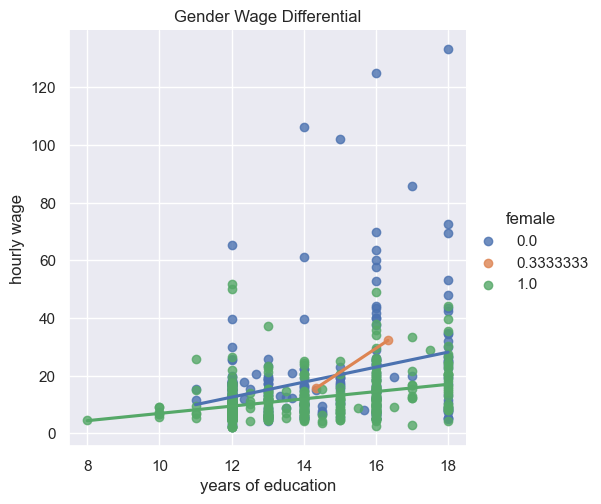

In [51]:
sns.lmplot(x='educ',y='hrwage',hue='female',ci=None,data=df) # hue = "female" creates separate plot based on the variable female
plt.xlabel('years of education')
plt.ylabel('hourly wage')
plt.title('Gender Wage Differential')
plt.show()

## Joint Hypothesis Testing

We want to test the hypotheses: H0: β1=0,β2=2,β4=β5 vs. H1:at least one of the contraint in null is false.

In [54]:
model_f = smf.ols(formula = "logwage ~ educ + pexp + pexp2 + female + white", data = df)
results_f = model_f.fit(cov_type = 'HC1')
hypotheses = '(educ = 0), (pexp = 2), (female = white)'
ftest = results_f.f_test(hypotheses)
print(ftest)

<F test: F=42885.03653756249, p=0.0, df_denom=674, df_num=3>


White Test for Heteroskedasticity

Step 1: Run the main regression, and save squared residuals

In [55]:
model_w = smf.ols(formula = "logwage ~ educ + pexp", data = df)
results_w = model_w.fit(cov_type = 'HC1')
df['resid2'] = (results_w.resid)**2
df.head()

,first,educ,educt,hrwage,lwage,age,white,female,selfemp,uncov,...,dcpedhs,dcpedhst,dcpedcl,dcpedclt,resid,logwage,pexp,pexp2,educ_f,resid2
0,1.0,16.0,16.0,11.935570,2.479523,33.25119,1.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,-6.315782,2.479523,10.25119,105.086896,16.0,0.013519
1,NaN,16.0,16.0,9.208958,2.220177,33.25119,1.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,-9.042394,2.220177,10.25119,105.086896,16.0,0.141087
2,NaN,12.0,16.0,9.283223,2.228209,43.57014,1.0,1.0,0.0,1.0,...,-4.0,-6.0,0.0,0.0,-1.229057,2.228209,24.57014,603.691780,12.0,0.005344
3,1.0,18.0,12.0,19.096920,2.949527,43.57014,1.0,1.0,0.0,1.0,...,6.0,4.0,0.0,0.0,-3.023968,2.949527,18.57014,344.850100,18.0,0.003976
4,NaN,12.0,12.0,15.447340,2.728481,30.98391,1.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,4.935060,2.737437,11.98391,143.614099,0.0,0.429425


Step 2: Run the auxiliary regression
检验残差平方与所有自变量，自变量的平方和以及所有自变量的交叉乘积都不相关

In [56]:
df['educ2'] = (df['educ'])**2
df['pexp_educ'] = (df['pexp'])*(df['educ'])
model_aux = smf.ols(formula = "resid2 ~ educ + pexp + educ2 + pexp2 + pexp_educ", data = df)
results_aux = model_aux.fit(cov_type = 'HC1')
hypotheses = '(educ = 0), (pexp = 0), (educ2=0), (pexp2=0), (pexp_educ=0)'
ftest = results_aux.f_test(hypotheses)
print(ftest)

<F test: F=3.4713848901110977, p=0.00417919105853788, df_denom=674, df_num=5>


## Difference in Differences

In [ ]:
did = pd.read_csv("did.csv")
did.head()

In [ ]:
did_model1 = smf.ols(formula = "fte ~ d + nj + d_nj", data = did)
did_results1 = did_model1.fit(cov_type = 'HC1')
print(did_results1.summary())

In [ ]:
did_model2 = smf.ols(formula = "fte ~ d + nj + d_nj + kfc + roys + wendys ", data = did)
did_results2 = did_model2.fit(cov_type = 'HC1')
print(did_results2.summary())